In [255]:

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
import seaborn

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from patsy import dmatrices

# Intro to Data

In [4]:
df = pd.read_csv('top10s.csv', encoding='latin1')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


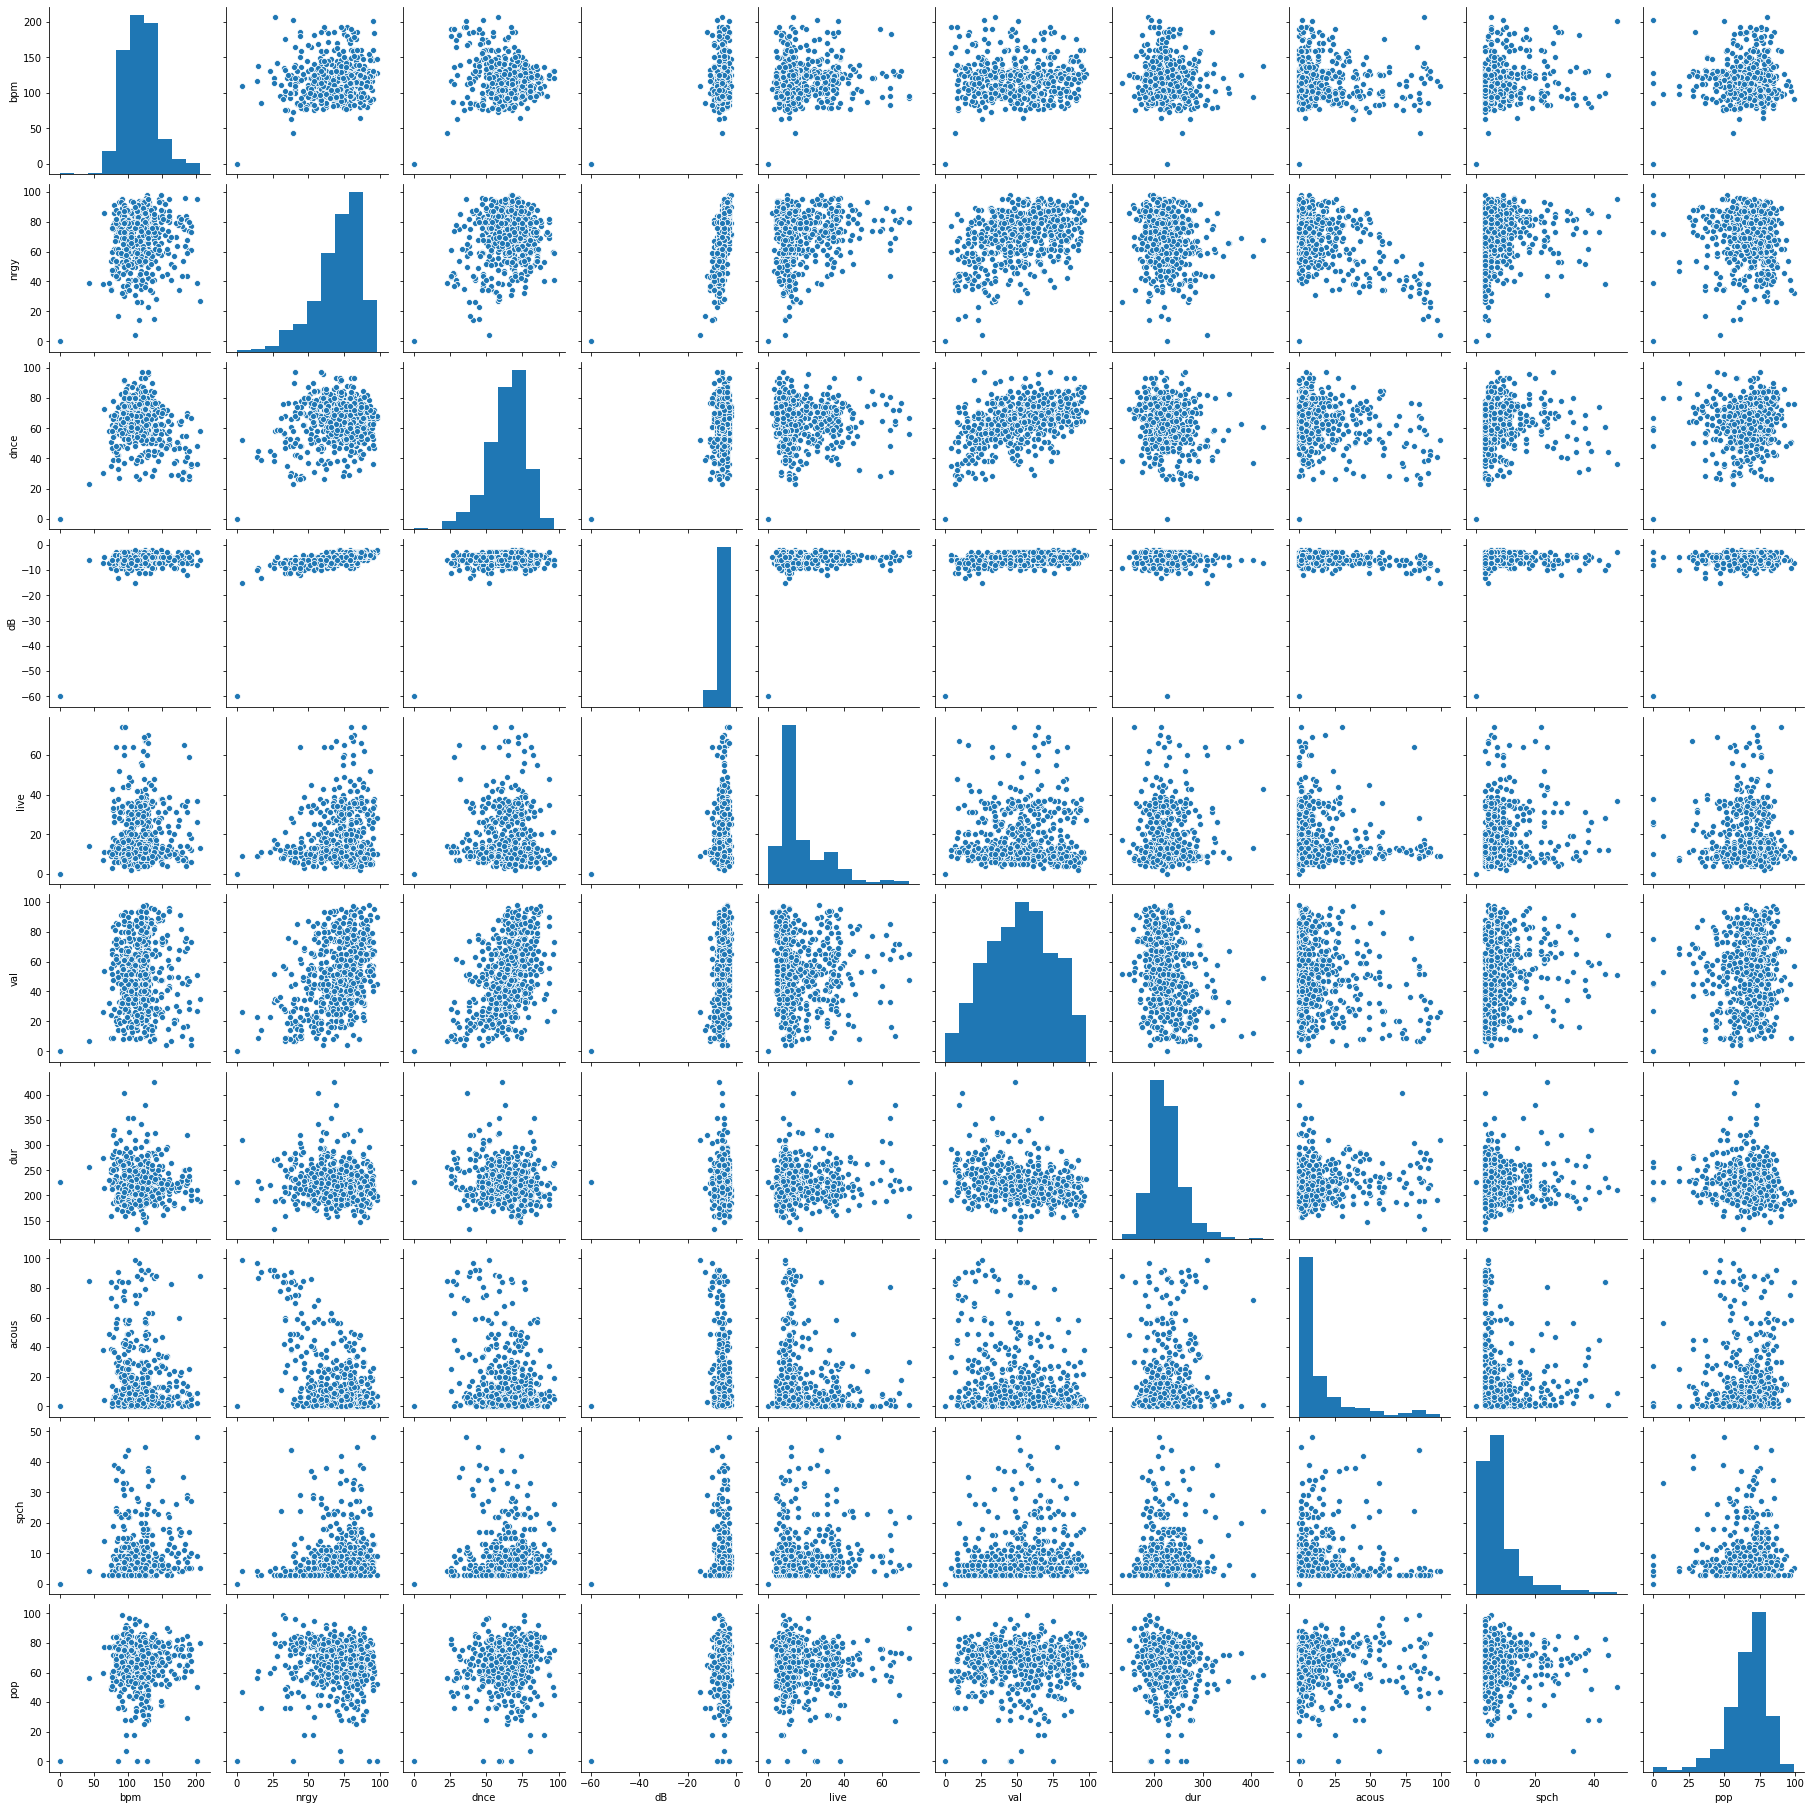

In [5]:
seaborn.pairplot(df.loc[:, 'bpm':'pop'])

# Least Squares Model: All Characteristics

In [555]:
popularity = df["pop"]
X = df.loc[:, 'bpm':'spch']

model = sm.OLS(popularity, X)
results = model.fit()
resid=results.resid
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pop   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              1249.
Date:                Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                        23:13:25   Log-Likelihood:                         -2498.7
No. Observations:                 603   AIC:                                      5015.
Df Residuals:                     594   BIC:                                      5055.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bpm            0.1307      0.023      5.635      0.000       0.085       0.176
nrgy           0.1554      0.047      3.327      0.001       0.064       0.247
dnce           0.3888      0.048      8.031      0.000       0.294       0.484
dB            -0.2295      0.235     -0.977      0.329      -0.691       0.232
live          -0.0698      0.050     -1.410      0.159      -0.167       0.027
val           -0.0260      0.036     -0.728      0.467      -0.096       0.044
dur            0.0632      0.016      3.903      0.000       0.031       0.095
acous          0.1520      0.034      4.466      0.000       0.085       0.219
spch          -0.0517      0.086     -0.599      0.550      -0.221       0.118
==============================================================================
Omnibus:                      137.896   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.006
Skew:                          -1.177   Prob(JB):                     4.88e-73
Kurtosis:                       5.776   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mutual Independence Scatterplot

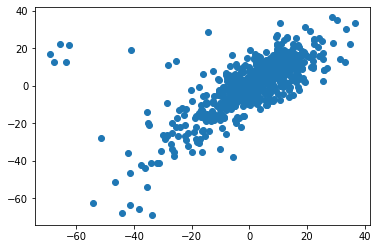

In [556]:
plt.scatter(resid[:-1], resid[1:])

## QQ Plot

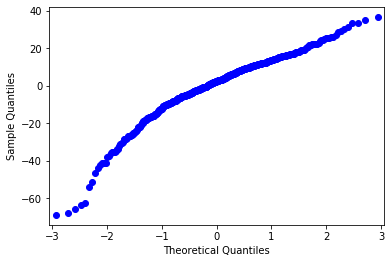

In [557]:
sm.qqplot(resid, dist='norm');

## Residual Plots

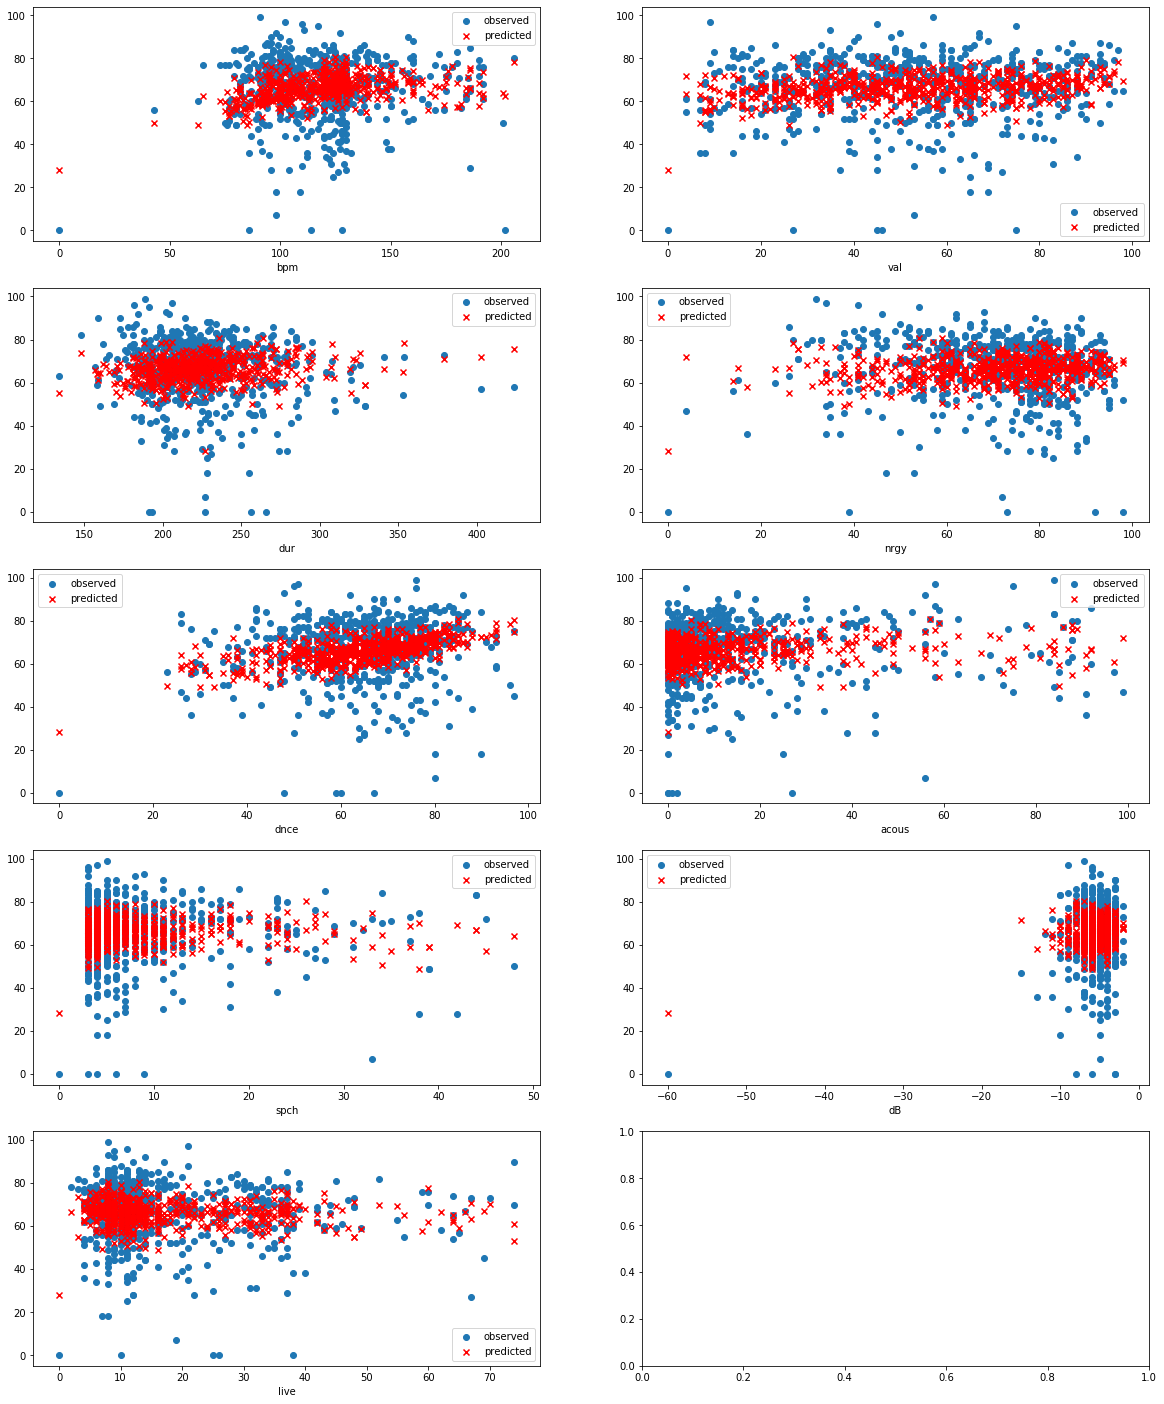

In [558]:
fig, ax = plt.subplots(5,2,figsize =(20,25))
for i in range(9):
    yhat=results.predict(X)
    ax[i%5][i%2].scatter(X.iloc[:,i],popularity,marker='o',label="observed")
    ax[i%5][i%2].scatter(X.iloc[:,i],yhat,marker='x',color="red",label="predicted")
    ax[i%5][i%2].set_xlabel(X.columns[i])
    ax[i%5][i%2].legend()


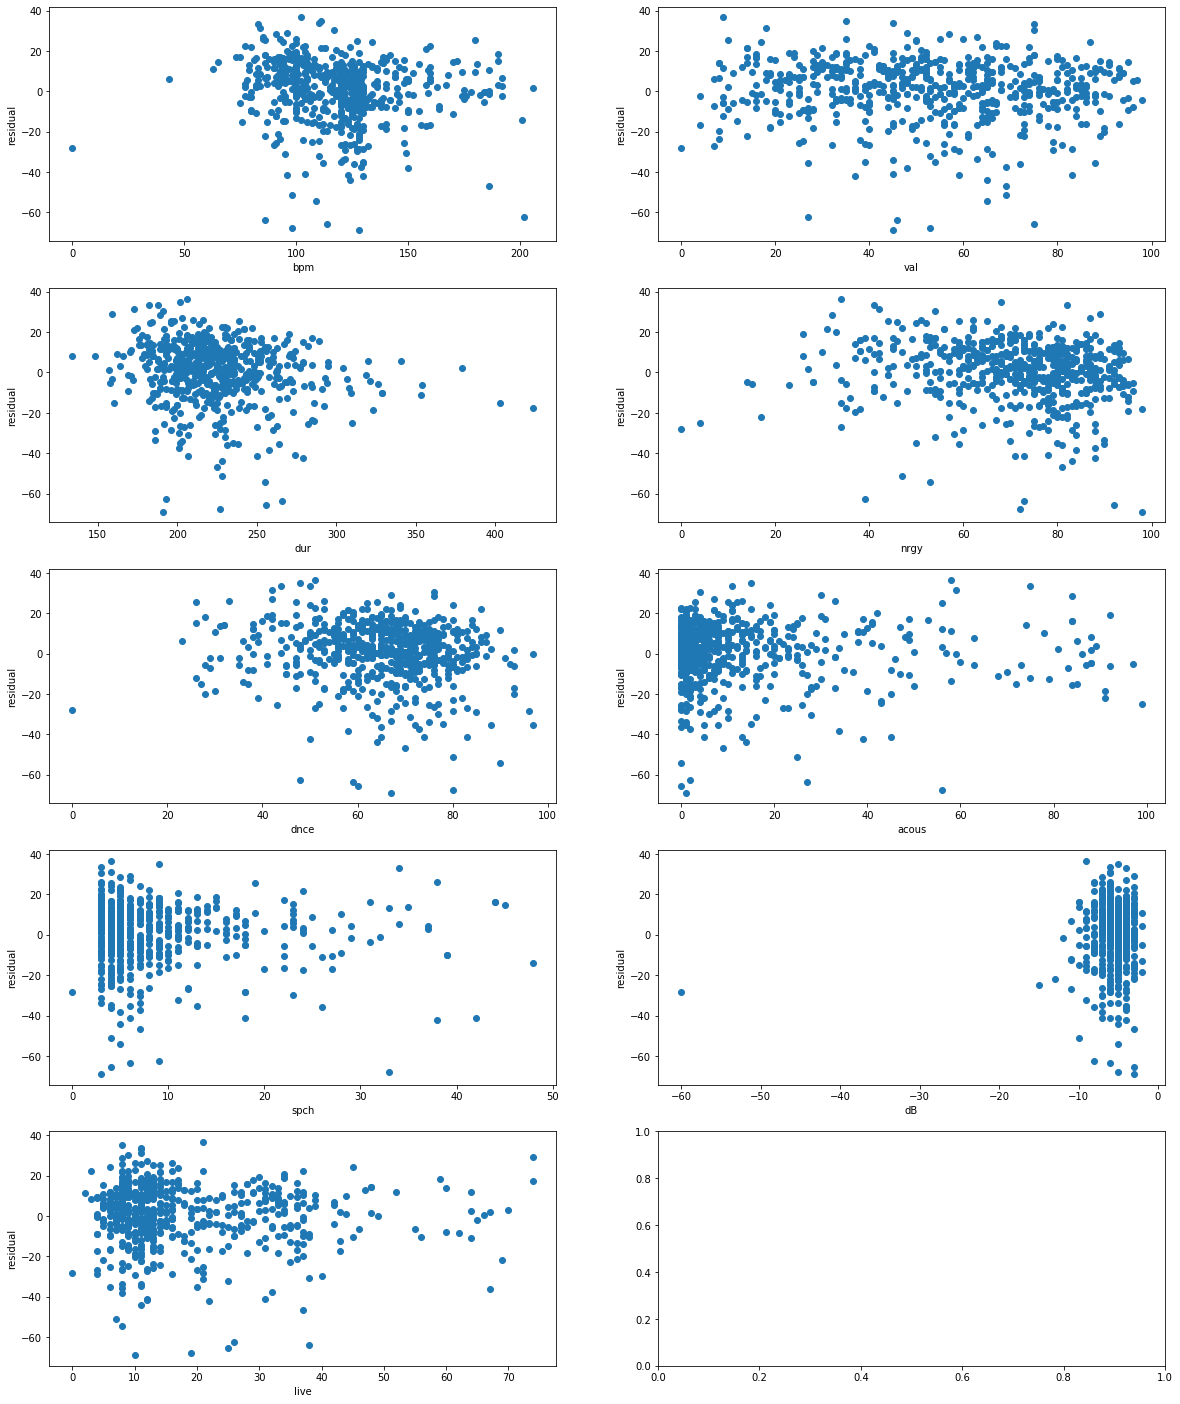

In [559]:
fig, ax = plt.subplots(5,2,figsize =(20,25))
for i in range(9):
    ax[i%5][i%2].scatter(X.iloc[:,i],resid) 
    ax[i%5][i%2].set_xlabel(X.columns[i])
    ax[i%5][i%2].set_ylabel("residual")

## Homoskedasticity

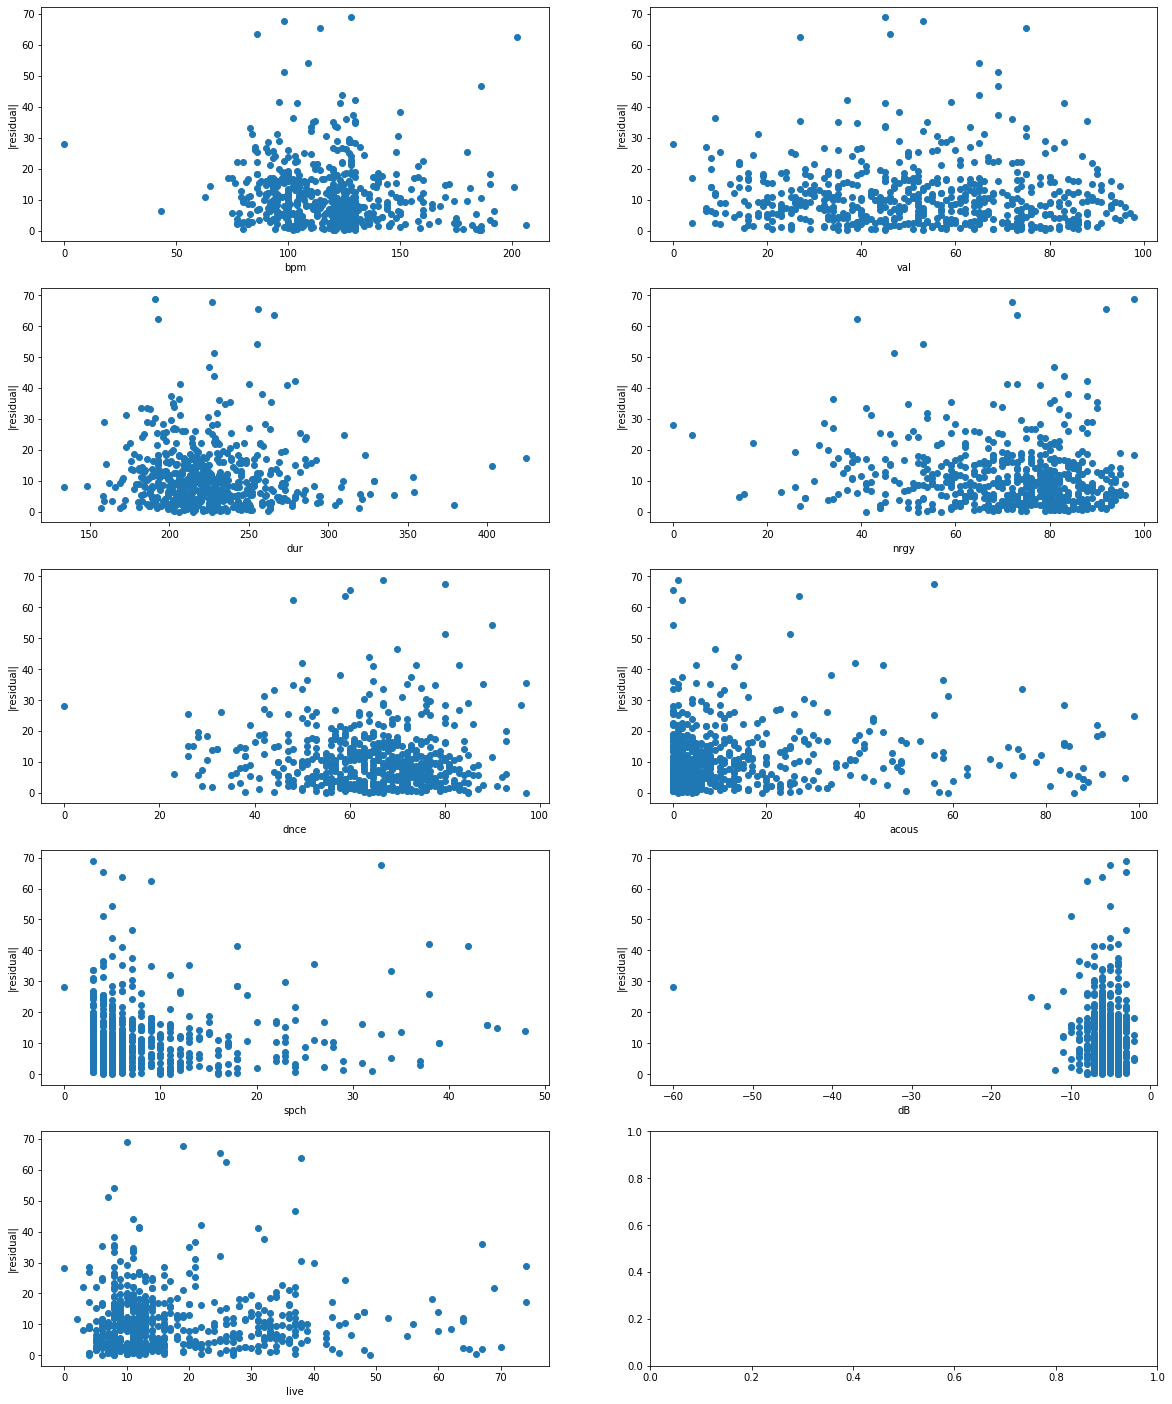

In [560]:
fig, ax = plt.subplots(5,2,figsize =(20,25))
for i in range(9):
  ax[i%5][i%2].scatter(X.iloc[:,i],np.abs(resid)) 
  ax[i%5][i%2].set_xlabel(X.columns[i]) 
  ax[i%5][i%2].set_ylabel("|residual|")

## Predicted Outcome vs True Outcome

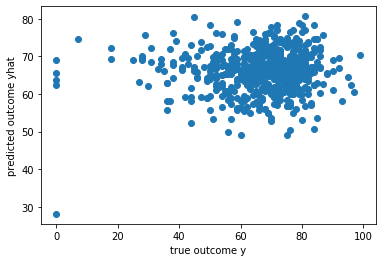

In [561]:
yhat = results.predict(X) 
plt.scatter(popularity, yhat)
plt.xlabel("true outcome y")
plt.ylabel("predicted outcome yhat")

plt.show()

# Least Squares Model: Select Characteristics

In [592]:
popularity = df["pop"]
X = df[["dnce","nrgy","val"]]
model = sm.OLS(popularity, X)
results = model.fit()
resid=results.resid
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pop   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              2833.
Date:                Tue, 12 May 2020   Prob (F-statistic):                        0.00
Time:                        00:14:15   Log-Likelihood:                         -2581.0
No. Observations:                 603   AIC:                                      5168.
Df Residuals:                     600   BIC:                                      5181.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dnce           0.7405      0.044     16.805      0.000       0.654       0.827
nrgy           0.3440      0.038      9.142      0.000       0.270       0.418
val           -0.1340      0.038     -3.490      0.001      -0.209      -0.059
==============================================================================
Omnibus:                       69.334   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.859
Skew:                          -0.684   Prob(JB):                     3.15e-30
Kurtosis:                       4.881   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mutual Independence Scatterplot/QQ Plot

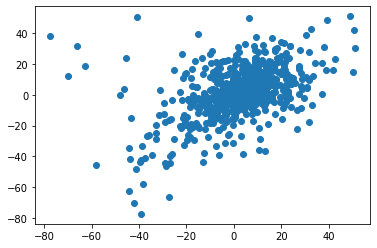

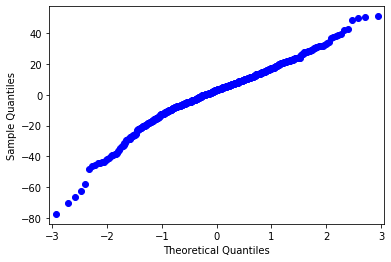

In [593]:
plt.scatter(resid[:-1], resid[1:])
sm.qqplot(resid, dist='norm');

## Residual Plots

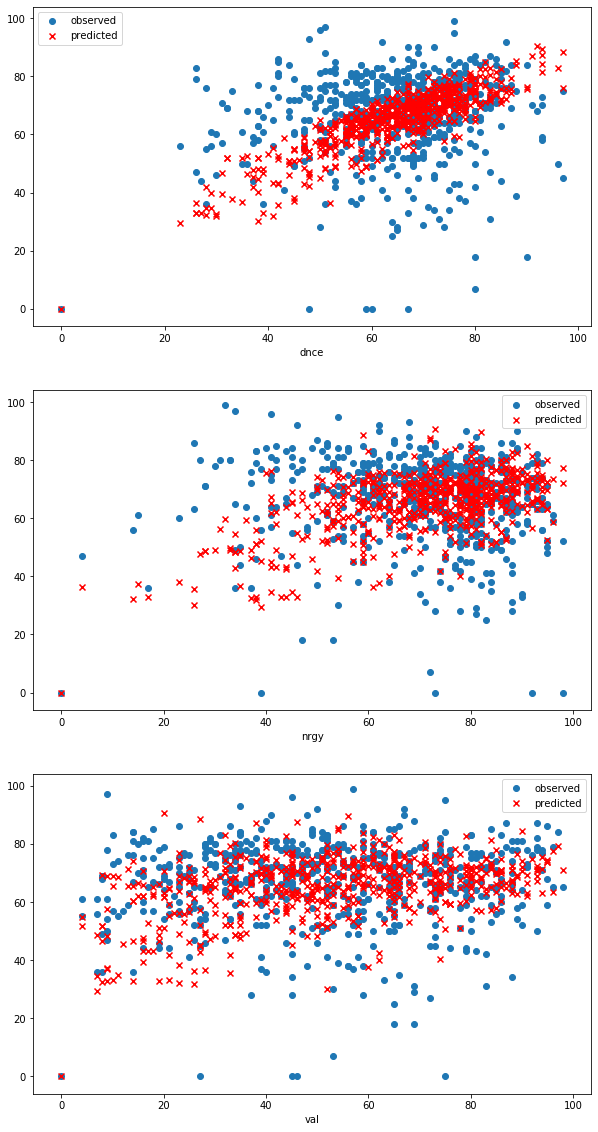

In [594]:
fig, ax = plt.subplots(3,figsize =(10,20))
for i in range(3):
    yhat=results.predict(X)
    ax[i].scatter(X.iloc[:,i],popularity,marker='o',label="observed")
    ax[i].scatter(X.iloc[:,i],yhat,marker='x',color="red",label="predicted")
    ax[i].set_xlabel(X.columns[i])
    ax[i].legend()

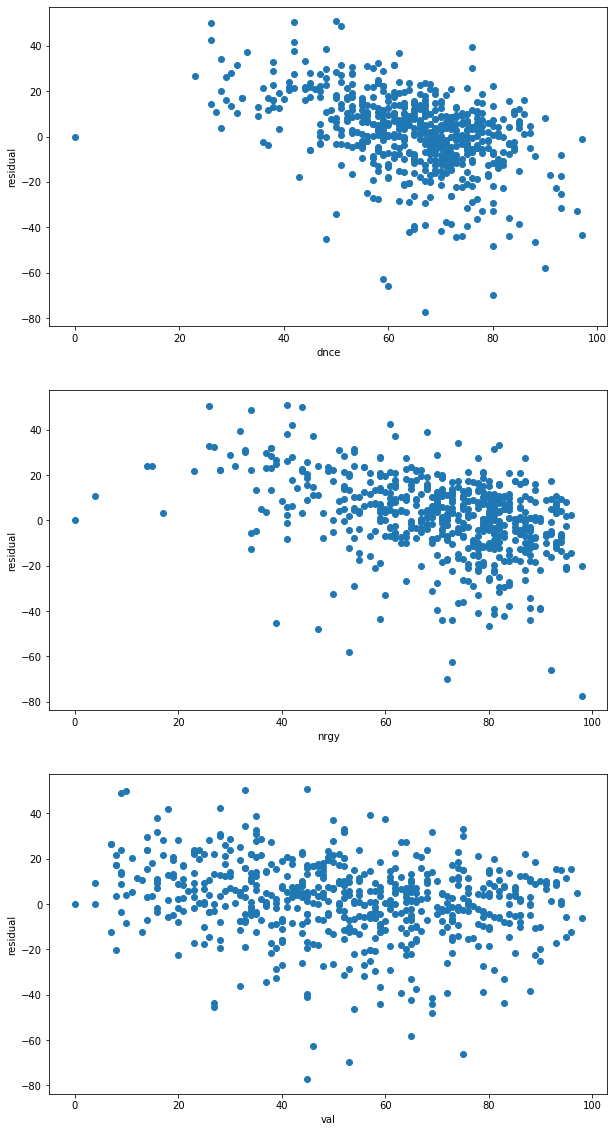

In [595]:
fig, ax = plt.subplots(3,figsize =(10,20))
for i in range(3):
    ax[i].scatter(X.iloc[:,i],resid) 
    ax[i].set_xlabel(X.columns[i])
    ax[i].set_ylabel("residual")

## Homoskedasticity

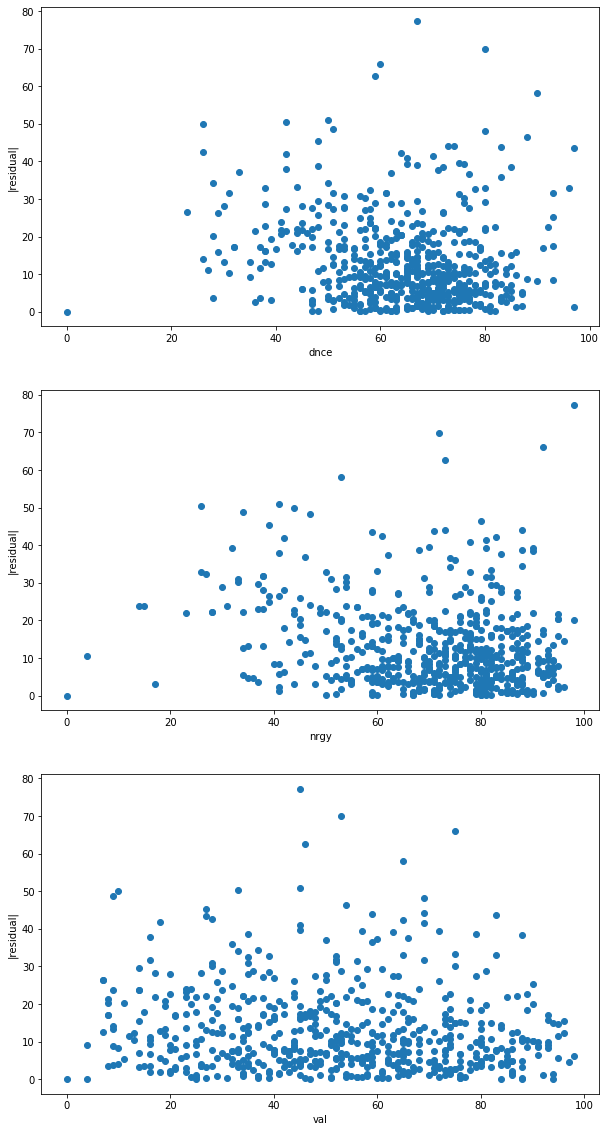

In [596]:
fig, ax = plt.subplots(3,figsize =(10,20))
for i in range(3):
  ax[i].scatter(X.iloc[:,i],np.abs(resid)) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("|residual|")

## Predicted Outcome

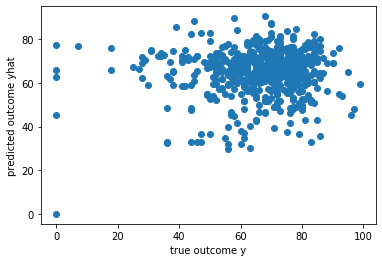

In [597]:
yhat = results.predict(X) 
plt.scatter(popularity, yhat)
plt.xlabel("true outcome y")
plt.ylabel("predicted outcome yhat")

plt.show()

# Minimizing AIC on Least Squares

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, popularity, test_size=0.25, random_state=0)

## Minimum AIC

In [604]:
def minAIC(X,Y):
    variables = X.columns
    model = sm.OLS(Y,X[variables]).fit()
    while True:
        max_p = np.max(model.pvalues)
        new_var = variables[model.pvalues < max_p]
        new_model = sm.OLS(Y,X[new_var]).fit()
        if new_model.aic < model.aic:
            model = new_model
            variables = new_var
        else:
            break
    return model,variables

model,variables = minAIC(X_train, y_train)
print(variables)

yhat = model.predict(X_test[variables])
print(mean_squared_error(y_test,yhat))

Index(['dnce', 'nrgy', 'val'], dtype='object')
376.7151496780946


## Current AIC

In [605]:
model = sm.OLS(y_train,X_train).fit()
print(X_train.columns.values)
yhat = model.predict(X_test)
print(mean_squared_error(y_test,yhat))

['dnce' 'nrgy' 'val']
376.7151496780946


# Least Squares Model: One Characteristic
Just to see what it could be

In [565]:
popularity = df["pop"]
X = df['dnce']

model = sm.OLS(popularity, X)
results = model.fit()
resid=results.resid
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pop   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              7403.
Date:                Mon, 11 May 2020   Prob (F-statistic):                        0.00
Time:                        23:14:10   Log-Likelihood:                         -2620.6
No. Observations:                 603   AIC:                                      5243.
Df Residuals:                     602   BIC:                                      5248.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dnce           0.9958      0.012     86.039      0.000       0.973       1.018
==============================================================================
Omnibus:                       54.680   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.827
Skew:                          -0.599   Prob(JB):                     4.22e-21
Kurtosis:                       4.516   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mutual Independence and QQ plot

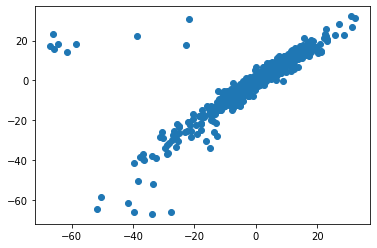

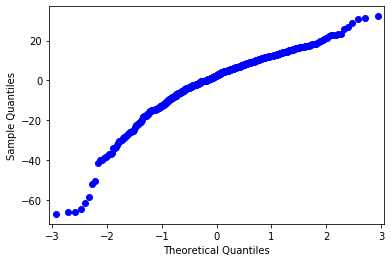

In [563]:
plt.scatter(resid[:-1], resid[1:])
sm.qqplot(resid, dist='norm');

## Residual Plots

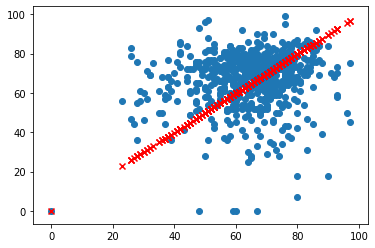

In [566]:
yhat=results.predict(X)
plt.scatter(X,popularity,marker='o',label="observed")
plt.scatter(X,yhat,marker='x',color="red",label="predicted")

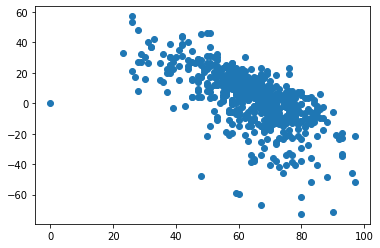

In [567]:
plt.scatter(X,resid)

## Homoskedasticity

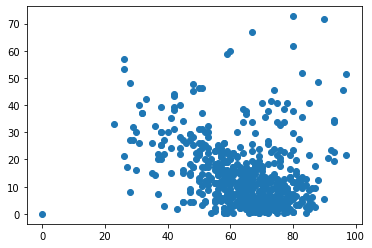

In [568]:
plt.scatter(X,np.abs(resid))